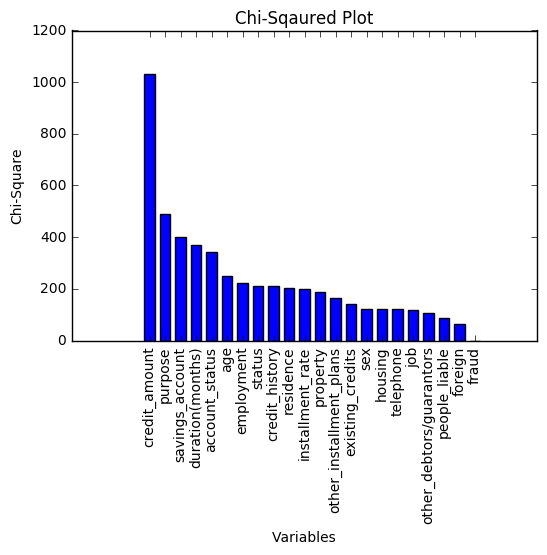

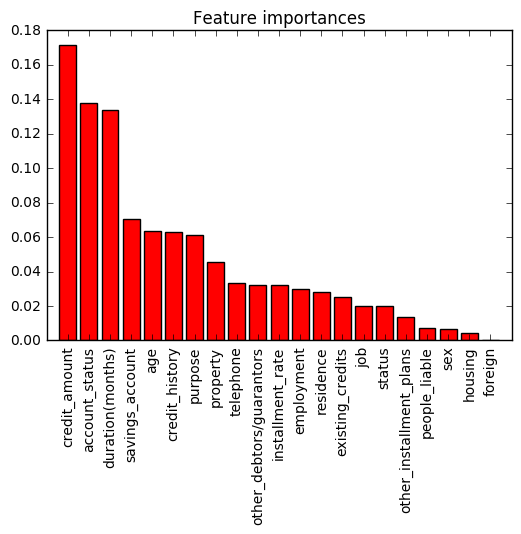

In [30]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing


def explore(file, target):
    df = pd.read_csv(file)

    if len(set(df[target])) < 11:
        chi = []
        for column in df:
            obs = np.array([df[column], df['fraud']])
            chi.append(chi2_contingency(obs)[0])

        indices = np.argsort(chi)[::-1]

        columns= []
        for i in indices:
            name = df.columns[i]
            columns.append(name)

        x = []
        y = sorted(chi, reverse=True)
        for i in range(len(y)):
            x.append(i)
        plt.bar(x, y, width=0.7, align='center')
        plt.xticks(x, columns, rotation=90)
        plt.xlabel('Variables')
        plt.ylabel('Chi-Square')
        plt.title('Chi-Sqaured Plot')
        plt.show()
    else:
        correlations = df.corr()
        cax = plt.matshow(correlations, vmin=-1, vmax=1)
        plt.colorbar(cax)
        plt.figure(figsize=(15, 15))
        plt.show()

    # Our variables for the classification task
    X = np.array(df.drop([target], 1))
    y = np.array(df[target])

    # Build a forest and compute the feature importances
    # clf = ExtraTreesClassifier(n_estimators=250, random_state=0)
    clf = DecisionTreeClassifier(random_state=0)

    clf.fit(X, y)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = []
    for i in indices:
        name = df.columns[i]
        columns.append(name)
    # print(columns)

    # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(X.shape[1]):
#         print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
    plt.xticks(range(X.shape[1]), columns, rotation='90')
    plt.xlim([-1, X.shape[1]])
    plt.show()

explore('data/german_num_data_train.csv', 'fraud')